# Wine Quality

## Executive Summary

A number of models were run to classify the qualities of red and white wine. 

## Introduction

This project is a top-down rewrite of an old university project. The data is from UCI and is seperated into red and white wine. The data consists of a number of chemical attributes for the wines, such as pH level or alcohol content, as well as a "quality" value for each wine. In this analysis, I looked at the empirical relationship between the chemical attributes and the quality perscribed.

## Synopsis

### Exploratory Data Analysis

#### Data Cleaning

The data cleaning was fairly straightforward, only a handful of NaN values were present in either the white or red dataset, and those instances were removed completely. Following this, all but the target variable were scaled using a custom function.

#### Insight

The first thing to note about the dataset is the fact that both the red wine and white wine data is severly imbalanced. 

### Full Classification

The initial approach for this dataset was to classify all 6 unique quality values. Six different models were fitted, K Nearest Neighbours, K-Means, Naive Bayes, Logistic Regression, Decision Tree and a Random Forest.

#### Red Wine

For the red wine dataset, accuracy scores for the KNN, Naive-Bayes, Logistic Regression Decision Tree and Random Forest models were 63.4%, 54.5%, 54,7% 54.9%, and 64.0%. For the K-Means clustering algorithm, the quality values were plotted with the number placed in each cluster. None of the clusters had a consistent preference for a quality value, which indicates the data did not cluster well. Finally, an ensemble model was created using all the models except K-Means. The final model had slightly improved accuracy, with much better recall and precision than the previous models.

#### White Wine

The approach was repeated on the white wine dataset for comparison. The only difference was that the white wine dataset had 7 distinct qualities, whereas the red wine dataset had only 6. The performance of the models was similar, particularly in regards to the classification 

### Simplified Classification

Due to the low performance of the models on the full range of quality values, I decided to simplify the values into three groups: low, medium and high quality, comprising of qualities 3 and 4, 5 and 6, and 7 and 8 (and 9 in the case of white wine) respectively. The same models as above were applied to the datasets.

#### Red Wine

The models applied to the simplified red wine dataset exhibited the same shortcomings as with the full classification. Wine with a low quality was not classified by any of the models, and the performance was not much better among the high-quality wine, either.


#### White Wine

Finally, the white wine models had the same shortcommings as the red wine. 


In [136]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn import neighbors
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, IsolationForest
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
#plt.figure(figsize=(15,15))

plt.style.use('ggplot')

In [2]:
DATA_PATH = "../data/wine-quality/"
RED_WINE_FILENAME = "winequality-red.csv"
WHITE_WINE_FILENAME = "winequality-white.csv"

In [3]:
redWine = pd.read_csv(DATA_PATH + RED_WINE_FILENAME,sep=";")
whiteWine = pd.read_csv(DATA_PATH + WHITE_WINE_FILENAME,sep=";")

In [4]:
redWine = redWine.dropna()
whiteWine = whiteWine.dropna()

In [5]:
redWine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [6]:
whiteWine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 497.5 KB


5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

# Exploratory Data Analysis

## Red Wine

In this segment, I look at the Red Wine dataset. The first thing to note about this dataset is how the labels (wine quality) are unbalanced.

In [7]:
redWine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


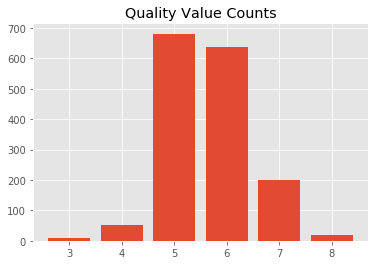

In [191]:
#plt.bar(redWine["quality"].value_counts(normalize=True))
plt.bar(redWine["quality"].value_counts().index.values,redWine["quality"].value_counts().values)
plt.title("Quality Value Counts")
plt.show()

#### Attributes v Quality

Plotting crosstab charts for all the variables, we see that not only is the data severely imbalanced (majority of the wines are concentrated at quality 5 and 6) but the distributions of the variables vary with respect to quality. In the example below, a citric acid value of 0.5 is prevelant with the higher quality wines (7 and 8) while the lower quality wines (3 and 4) have a greater proportion of wines with a citric acid of 0.2 or lower. This trend was present in all the variables to some degree, and the notable cases are displayed below.

The most significant take-away of the graphs below is, as stated, the extent to which the data is imbalanced. Any model fitted to this dataset must be properly critiqued, as a decent accuracy score could be achieved by simple guessing a quality of 5 or 6 for all wine.

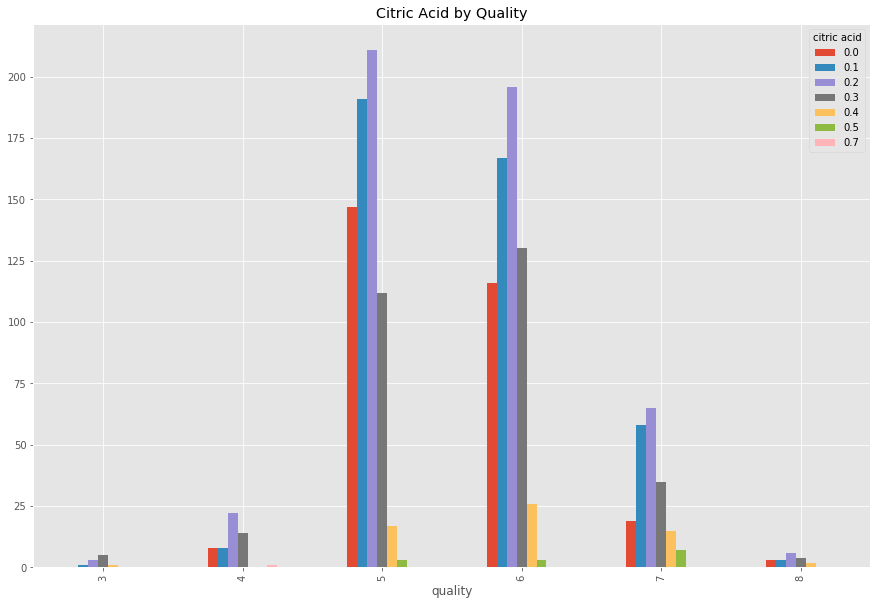

In [128]:

#pd.crosstab(redWine["quality"],redWine["citric acid"].apply(lambda x: round(x,1))).plot(kind="bar",figsize=(15,10),title="Citric Acid by Quality")
mymean = redWine["citric acid"].mean()
pd.crosstab(redWine["quality"],redWine["citric acid"].apply(lambda x: round(abs(x-mymean),1))).plot(kind="bar",figsize=(15,10),title="Citric Acid by Quality")
plt.show()
# here we see that the higher citric acid values are more prevelant with higher quality wine

The graph below indicates a similar trend as the one above. Here we can see the varying distributions of alcohol with respect to quality. Red wine with a quality of 6 or less is distributed with a predominantly 10% alcohol content while wine with a quality of 7 or more tends more towards 12% and 13%. This does appear to suggest that there is a positive linear relationship between the ascribed quality of a wine and the alcohol content, and intuitively this makes sense as a higher alcohol content can indicated a longer fermentation process, which may lead to more flavour. This must be treated with caution, however, as the low sample size of wine where quality is not 5 or 6 may be skeweing the data.

In [ ]:
pd.crosstab(redWine["quality"],redWine["alcohol"].apply(lambda x: round(x))).plot(kind="bar",figsize=(15,8),title="Alcohol Content by Quality")
plt.show()
# higher alcohol content = higher wine "quality"

With this third chart, the phenomenon is not as pronounced as before. The only noteworthy observation here is that the higher quality wines appear to be concentrated more at the lower volatile acidity values, whereas the medium quality wines are concentrated more at 0.5, 0.6 volatile acidity and the low quality wines are evenly distributed.

In [ ]:

pd.crosstab(redWine["quality"],redWine["volatile acidity"].apply(lambda x: round(x,1))).plot(kind="bar",figsize=(15,8),title="Volatile Acidity by Quality")
plt.show()

In [ ]:
def plotHistograms(df,col,cats,target,bins):
    plt.figure(figsize=(8,8))
    for cat in sorted(cats):
        value,bins = np.histogram(df.loc[(df[col] == cat),target],bins=bins)
        value = [x/sum(value) for x in value]
        plt.plot(bins[1:],value,label=cat,linewidth=6.0,alpha=0.5)
    plt.legend(loc="upper right")
    plt.title("Distribution Plot for {} and {}".format(target,col))
    plt.xlabel("{}".format(target))
    plt.ylabel("Amount")
    plt.show()
    


The following charts overlay the resized distributions against each other, so that the shape can be compared between qualities. The chart directly below shows the citric acid distributions graphed by quality. Two things can be noted from this plot: the 3 and 4 quality wine distributions tend towards low citric acid values, with 70% and 55% of quality 3 and 4 wine, respectively, having a citric acid value of 0.1 or less. Wine with a quality of 7 and 8 appear to show a slightly different picture, where distribution tends toward higher citric acids values, albeit with a lot of noise, probably due to the small sample size.

In [ ]:
plotHistograms(redWine,"quality",redWine["quality"].unique(),"citric acid",np.linspace(-0.1,1.0,11))

The chart below shows the same plot but for the alcohol attribute. Here, a clear trend emerges, where wines with a quality of 5 or less are concentrated at 10% (half of wine with a quality of 3 has an alcohol content of 10%). The higher quality wines (7 and 8) have distributions centered around 12%, with less than 10% of 8 quality wine having an alcohol content of 11% or less. Higher quality wines appear to be more likely to have a higher alcohol conent and the inverse appears to be true for lower quality wines.

In [ ]:
plotHistograms(redWine,"quality",redWine["quality"].unique(),"alcohol",np.linspace(7,15,9))

In [ ]:
plotHistograms(redWine,"quality",redWine["quality"].unique(),"volatile acidity",np.linspace(0.0,1.6,17))


In [ ]:
#print(df.columns)
fig, ax = plt.subplots(figsize=(20,10))
#ax.matshow(df.corr())
#plt.matshow(df.corr(),ax=ax)
element = ax.matshow(df.corr())
ax.set_xticks([x for x in range(len(df.columns))])
ax.set_xticklabels(['']+df.columns)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_yticks([x for x in range(len(df.columns))])
ax.set_yticklabels(['']+df.columns)
ax.set_title("Attribute Cross-Correlation")
ax.title.set_position([0.5,1.20])
fig.colorbar(element)
#plt.figure(figsize=(15,15))
plt.show()

In [192]:
# scale the relevant columns

def myScaler(df,ignore=None):
    for col in df.columns:
        if col == ignore:
            continue
        df[col] = df[col].apply(lambda x: (x-min(df[col]))/(max(df[col])-min(df[col])))
    return df

def scoreModel(model,x_test,y_test,cont=False):
    pred = model.predict(x_test)
    labels = sorted(y_test.unique())
    if cont:
        pred = np.around(pred)
    acc = accuracy_score(y_test,pred)
    pre = precision_score(y_test,pred,average=None)
    rec = recall_score(y_test,pred,average=None)
    conf = confusion_matrix(y_test,pred,labels=labels)
    df = pd.DataFrame(conf,index=labels,columns=labels)
    print("Accuracy: {}\nPrecision: {}\nRecall: {}\n".format(acc,pre,rec))
    plt.figure(figsize=(10,5))
    sn.heatmap(df,annot=True).set(xlabel="Predicted",ylabel="Actual",title="Confusion Matrix")
    

In [10]:
df = myScaler(redWine,ignore="quality")

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,5.636023
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.807569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,5.000000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,6.000000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


#### The Models

The models which I selected were the K-Nearest-Neighbour, K-Means, Naive Bayes, Logistic Regression, Decision Tree and Random Forest. Finally, a voting classifier was created and critiqued. What follows below is just the routine test-train split followed by the application of a number of models to the dataset. 

In [138]:
# split test and train data

x_train, x_test, y_train, y_test = train_test_split(df.drop("quality",axis=1),df["quality"],test_size=0.45,random_state=42)

/Users/jakubkasan/coding/data-science/wine-quality/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.6083333333333333
Precision: [0.         0.         0.67806268 0.54180602 0.53623188 1.        ]
Recall: [0.         0.         0.76038339 0.58909091 0.40217391 0.09090909]

Confusion Matrix:


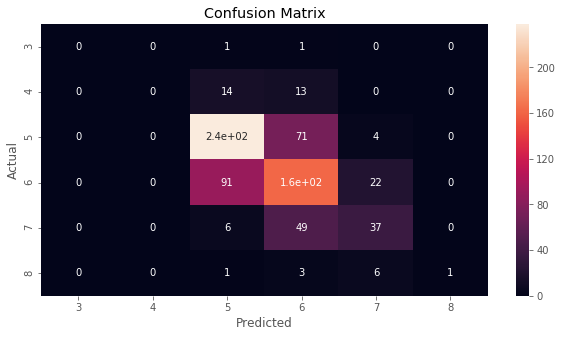

In [132]:
# K Nearest Neighbours

knn_model = neighbors.KNeighborsClassifier(30,weights="distance")
knn_model.fit(x_train,y_train)

scoreModel(knn_model,x_test,y_test)

In [ ]:
# K-Means Clustering

km_model = KMeans(n_clusters=6)
km_model.fit(x_train,y_train)
#km_model.score(x_test,y_test)

km_pred = km_model.predict(x_test)

temp_df = pd.DataFrame()
temp_df["Quality"] = y_test
temp_df["Cluster_num"] = km_pred
temp_df.groupby("Quality")["Cluster_num"].nunique()

# list cluster ID counts per quality value

for val in temp_df["Quality"].unique():
    print("Quality {}\nCluster\tCounts\n".format(val),temp_df.loc[temp_df["Quality"]==val ,"Cluster_num"].value_counts())

/Users/jakubkasan/coding/data-science/wine-quality/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.5152777777777777
Precision: [0.         0.         0.58392435 0.43514644 0.35087719 0.        ]
Recall: [0.         0.         0.78913738 0.37818182 0.2173913  0.        ]

Confusion Matrix:


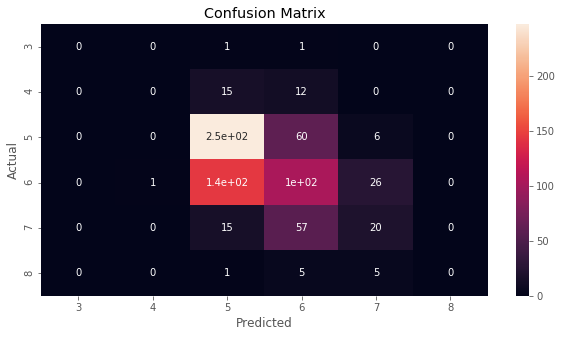

In [133]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
#nb_model.score(x_test,y_test)

scoreModel(nb_model,x_test,y_test)

/Users/jakubkasan/coding/data-science/wine-quality/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.5277777777777778
Precision: [0.         0.         0.59459459 0.44051447 0.5        0.        ]
Recall: [0.         0.         0.77316294 0.49818182 0.01086957 0.        ]

Confusion Matrix:


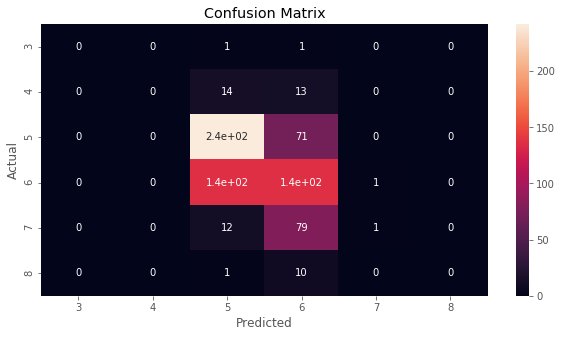

In [134]:
# Log Reg

log_model = LogisticRegression()
log_model.fit(x_train,y_train)
#log_model.score(x_test,y_test)

scoreModel(log_model,x_test,y_test)

##### Decision Tree Classifier

Accuracy: 0.5569444444444445
Precision: [0.         0.08       0.65217391 0.51360544 0.50684932 0.2       ]
Recall: [0.         0.07407407 0.67092652 0.54909091 0.40217391 0.09090909]

Confusion Matrix:


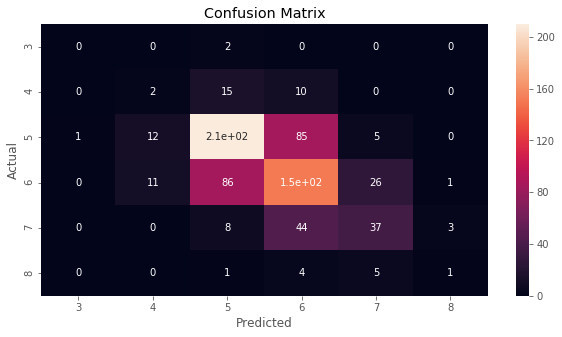

In [104]:
dt_model = DecisionTreeClassifier(max_depth=10,criterion="gini")
dt_model.fit(x_train,y_train)

scoreModel(dt_model,x_test,y_test)

##### Random Forrest Classifier

/Users/jakubkasan/coding/data-science/wine-quality/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.6347222222222222
Precision: [0.         0.         0.72891566 0.56363636 0.5        0.        ]
Recall: [0.         0.         0.77316294 0.67636364 0.31521739 0.        ]

Confusion Matrix:


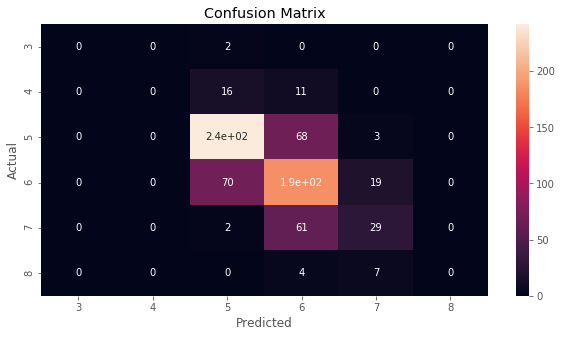

In [105]:
rf_model = RandomForestClassifier(n_estimators=100,max_depth=10)
rf_model.fit(x_train,y_train)

scoreModel(rf_model,x_test,y_test)

##### Ensemble Classifier

/Users/jakubkasan/coding/data-science/wine-quality/venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/jakubkasan/coding/data-science/wine-quality/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.6319444444444444
Precision: [0.         1.         0.70118343 0.55192878 0.70454545 0.        ]
Recall: [0.         0.03703704 0.7571885  0.67636364 0.33695652 0.        ]

Confusion Matrix:


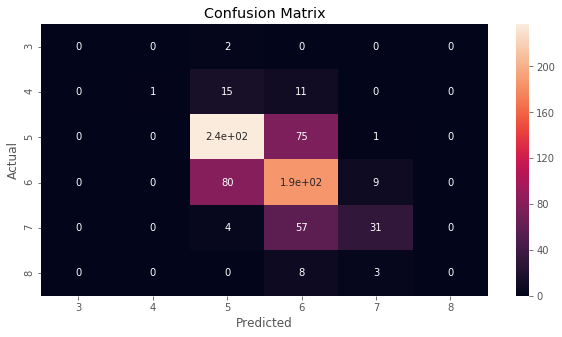

In [106]:
# Ensemble Classifier

eclf = VotingClassifier(estimators=[
    ("knn",knn_model),
    ("nb",nb_model),
    ("dt",dt_model),
    ("rf",rf_model),
    ("log",log_model),
], voting="hard")

eclf.fit(x_train,y_train)

scoreModel(eclf,x_test,y_test)


Accuracy: 0.5805555555555556
MAE: 0.44583333333333336

Accuracy: 0.5805555555555556
Precision: [0.         0.         0.68111455 0.5        0.51724138 0.        ]
Recall: [0.         0.         0.7028754  0.66545455 0.16304348 0.        ]

Confusion Matrix:


/Users/jakubkasan/coding/data-science/wine-quality/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


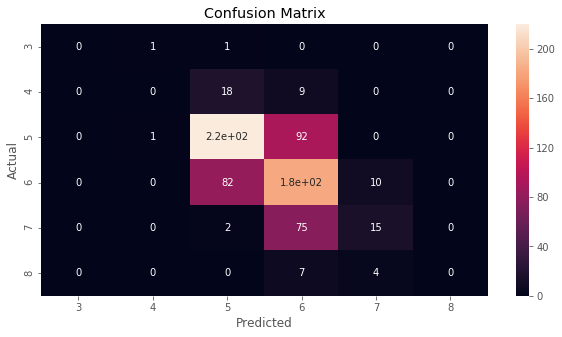

In [107]:
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)
lin_pred = lin_model.predict(x_test)
lin_pred = [round(x) for x in lin_pred]
score = 0
error = 0
for a,b in zip(lin_pred,y_test):
    if a == b:
        score += 1
    error += abs(a-b)
    

print("Accuracy: {}\nMAE: {}\n".format(score/len(lin_pred),error/len(lin_pred)))

scoreModel(lin_model,x_test,y_test,cont=True)

### Summary

After running the models, the first thing that stands out is the low performance in classifying the extreme classes, 3,4,7,8. This is likely due to the unbalanced data. 

### White Wine Analysis

What follows is the same exact procedure for the white wine dataset. The models applied are identical, as is the dataset with the exception of size, and the fact that some white wines are classified as quality 9, which was not present in the red wine dataset. While the Red Wine dataset was roughly 1600 observations, the White Wine dataset is 5000.

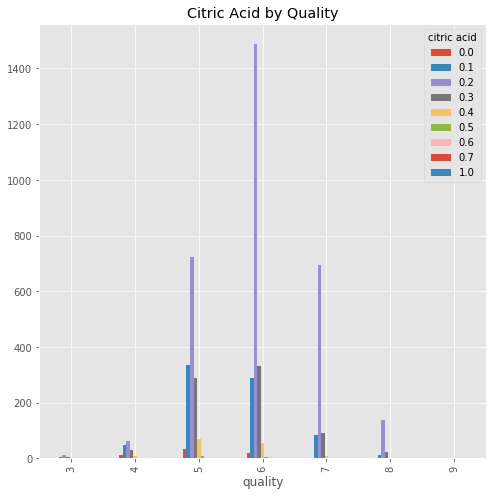

In [129]:
pd.crosstab(whiteWine["quality"],whiteWine["citric acid"].apply(lambda x: round(x,1))).plot(kind="bar",figsize=(8,8),title="Citric Acid by Quality")
plt.show()
# here we see that the higher citric acid values are more prevelant with higher quality wine

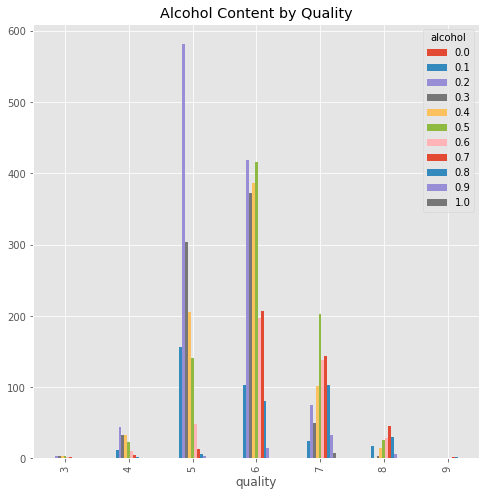

In [130]:
pd.crosstab(whiteWine["quality"],whiteWine["alcohol"].apply(lambda x: round(x,1))).plot(kind="bar",figsize=(8,8),title="Alcohol Content by Quality")
plt.show()
# higher alcohol content = higher wine "quality"

In [ ]:
pd.crosstab(whiteWine["quality"],whiteWine["volatile acidity"].apply(lambda x: round(x,1))).plot(kind="bar",figsize=(8,8),title="Volatile Acidity by Quality")
plt.show()

In [ ]:
plotHistograms(whiteWine,"quality",whiteWine["quality"].unique(),"volatile acidity",np.linspace(0.0,1.6,17))


In [ ]:
plotHistograms(whiteWine,"quality",whiteWine["quality"].unique(),"alcohol",np.linspace(0.07,0.15,9))

In [ ]:
plotHistograms(whiteWine,"quality",whiteWine["quality"].unique(),"citric acid",np.linspace(-0.1,1.0,11))

In [ ]:
#print(df.columns)
fig, ax = plt.subplots(figsize=(8,8))
#ax.matshow(df.corr())
#plt.matshow(df.corr(),ax=ax)
element = ax.matshow(df.corr())
ax.set_xticklabels(['']+df.columns)
ax.set_yticklabels(['']+df.columns)
fig.colorbar(element)
#plt.figure(figsize=(15,15))
plt.show()

In [34]:
df = myScaler(whiteWine,ignore="quality")

In [35]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.293730,0.194354,0.201320,0.088825,0.109117,0.116056,0.300141,0.133360,0.425697,0.313775,0.405527,5.877909
std,0.081141,0.098818,0.072903,0.077792,0.064831,0.059258,0.098603,0.057662,0.137273,0.132704,0.198487,0.885639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.240385,0.127451,0.162651,0.016871,0.080119,0.073171,0.229698,0.088924,0.336364,0.220930,0.241935,5.000000
50%,0.288462,0.176471,0.192771,0.070552,0.100890,0.111498,0.290023,0.127820,0.418182,0.290698,0.387097,6.000000
75%,0.336538,0.235294,0.234940,0.142638,0.121662,0.153310,0.366589,0.173318,0.509091,0.383721,0.548387,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


#### The Models

The models selected for

In [108]:
# split test and train data

x_train, x_test, y_train, y_test = train_test_split(df.drop("quality",axis=1),df["quality"],test_size=0.45,random_state=42)

/Users/jakubkasan/coding/data-science/wine-quality/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.6111111111111112
Precision: [0.         0.         0.68882175 0.5351682  0.59016393 1.        ]
Recall: [0.         0.         0.7284345  0.63636364 0.39130435 0.09090909]

Confusion Matrix:


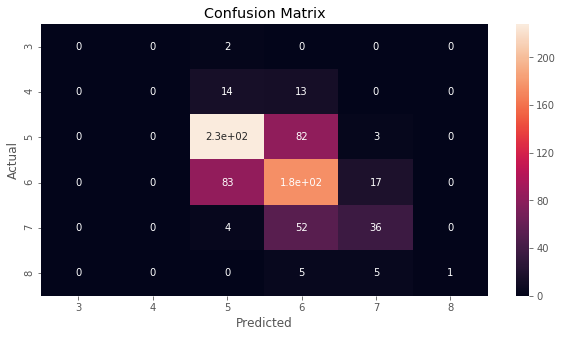

In [109]:
# K Nearest Neighbours

knn_model = neighbors.KNeighborsClassifier(30,weights="distance")
knn_model.fit(x_train,y_train)

scoreModel(knn_model,x_test,y_test)


In [ ]:
# K-Means Clustering

km_model = KMeans(n_clusters=6)
km_model.fit(x_train,y_train)
#km_model.score(x_test,y_test)

km_pred = km_model.predict(x_test)

temp_df = pd.DataFrame()
temp_df["Quality"] = y_test
temp_df["Cluster_num"] = km_pred
temp_df.groupby("Quality")["Cluster_num"].nunique()

# list cluster ID counts per quality value

for val in temp_df["Quality"].unique():
    print("Quality {}\nCluster\tCounts\n".format(val),temp_df.loc[temp_df["Quality"]==val ,"Cluster_num"].value_counts())

Accuracy: 0.5430555555555555
Precision: [0.         0.13043478 0.70454545 0.49226006 0.48863636 0.        ]
Recall: [0.         0.11111111 0.5942492  0.57818182 0.4673913  0.        ]

Confusion Matrix:


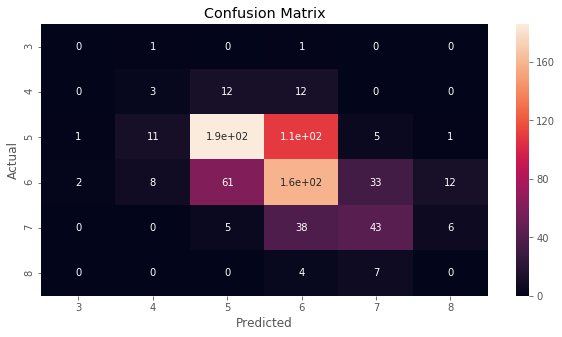

In [110]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)

scoreModel(nb_model,x_test,y_test)


/Users/jakubkasan/coding/data-science/wine-quality/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.5430555555555555
Precision: [0.         0.         0.61917098 0.45645646 0.         0.        ]
Recall: [0.         0.         0.76357827 0.55272727 0.         0.        ]

Confusion Matrix:


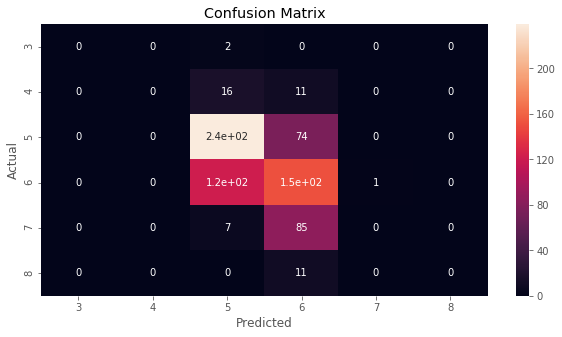

In [111]:
# Log Reg

log_model = LogisticRegression()
log_model.fit(x_train,y_train)

scoreModel(log_model,x_test,y_test)

##### Decision Tree Classifier





Accuracy: 0.5763888888888888
Precision: [0.33333333 0.06666667 0.67628205 0.52258065 0.52702703 0.16666667]
Recall: [0.5        0.03703704 0.67412141 0.58909091 0.42391304 0.09090909]

Confusion Matrix:


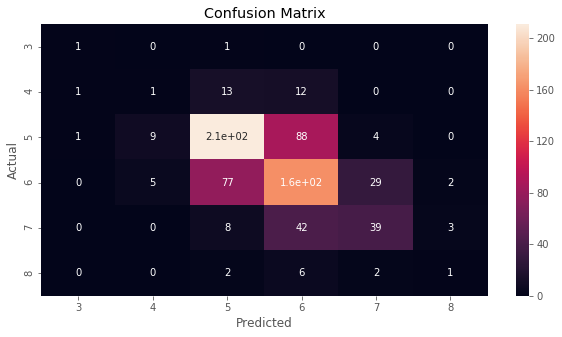

In [112]:
dt_model = DecisionTreeClassifier(max_depth=10,criterion="gini")
dt_model.fit(x_train,y_train)

scoreModel(dt_model,x_test,y_test)

##### Random Forrest Classifier

/Users/jakubkasan/coding/data-science/wine-quality/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.6361111111111111
Precision: [0.         0.         0.72205438 0.56748466 0.5483871  0.        ]
Recall: [0.         0.         0.76357827 0.67272727 0.36956522 0.        ]

Confusion Matrix:


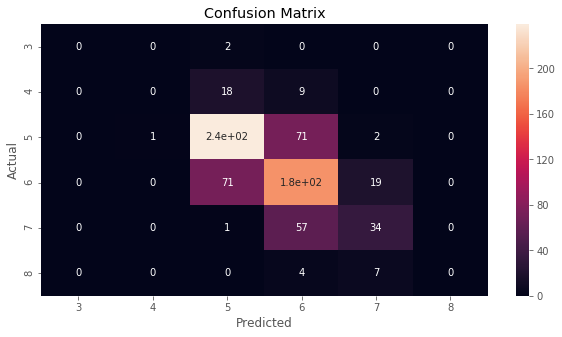

In [113]:
rf_model = RandomForestClassifier(n_estimators=100,max_depth=10)
rf_model.fit(x_train,y_train)

scoreModel(rf_model,x_test,y_test)

##### Ensemble Classifier

/Users/jakubkasan/coding/data-science/wine-quality/venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/jakubkasan/coding/data-science/wine-quality/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.6194444444444445
Precision: [0.         0.         0.69411765 0.53823529 0.675      0.        ]
Recall: [0.         0.         0.75399361 0.66545455 0.29347826 0.        ]

Confusion Matrix:


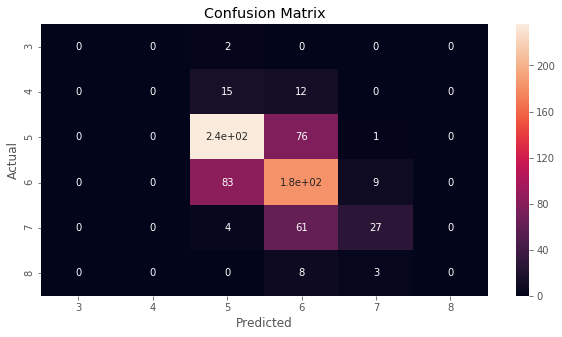

In [114]:
# Ensemble Classifier

eclf = VotingClassifier(estimators=[
    ("knn",knn_model),
    ("nb",nb_model),
    ("dt",dt_model),
    ("rf",rf_model),
    ("log",log_model),
],voting="hard")

eclf.fit(x_train,y_train)

scoreModel(eclf,x_test,y_test)

In [ ]:
#km_pred = km_model.predict(x_train)

#km_pred[4]

def myUnique(arr,count=False):
    values = {}
    for value in arr:
        if value in values.keys():
            values[value] += 1
        else:
            values[value] = 1
    if count:
        return values
    else:
        return values.keys()
    
#print(myUnique(km_pred))

# get a dictionary with quality for corresponsing cluster values
def associateClusterValues(predictions, qualities):
    if len(predictions) != len(qualities):
        print("Lengths Don't Match!")
        return None
    
    keys = {}
    
    for i in range(len(predictions)):
        if predictions[i] in keys.keys():
            continue
        else:
            keys[predictions[i]] = qualities[i]
            
    return keys


In [44]:
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)
lin_pred = lin_model.predict(x_train)
lin_pred = [round(x) for x in lin_pred]
score = 0
error = 0
for a,b in zip(lin_pred,y_train):
    if a == b:
        score += 1
    error += abs(a-b)
    

print("Accuracy: {}\nMAE: {}\n".format(score/len(lin_pred),error/len(lin_pred)))

scoreModel(lin_model,x_test,y_test,cont=True)


Accuracy: 0.5236208473026517
MAE: 0.5288021944529107

Accuracy: 0.5213358070500927
Precision: [0.         0.25       0.57608696 0.51371115 0.45033113 0.        ]
Recall: [0.         0.02173913 0.44915254 0.76880985 0.22368421 0.        ]



/Users/jakubkasan/coding/data-science/wine-quality/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Summary

The full model performed poorly, likely due to the face that the input data was unbalanced for both white wine and red wine. The model classified most wines in the middle two qualities, but the extremeties performed poorly. Particularly the lower quality wines (qualities 3 and 4), which were never classified correctly apart from with the Naive-Bayes model, where quality 4 wines were classified adequately.


## Simplified Model

The accuracy scores of the models above are not particularly great, and the clustering algorithm failed to seperate the datasets into meaningful clusters. As a result, I've decided to attempt the models with a simplified measure of quality. Quality ratings of 3 and 4 were replaced with 0, 5 and 6 with 1 and finally 7 and 8 (and 9 for white wine) with 2.

### Red Wine

As before, I began with the red wine dataset.

In [115]:
def simplifiedY(point):
    if point < 5:
        return 0
    elif point < 7:
        return 1
    else:
        return 2

    
df = myScaler(redWine,ignore="quality")
x_train, x_test, y_train, y_test = train_test_split(df.drop("quality",axis=1),df["quality"],test_size=0.45,random_state=42)

y_train_simple = y_train.apply(simplifiedY)
y_test_simple = y_test.apply(simplifiedY)

/Users/jakubkasan/coding/data-science/wine-quality/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.8486111111111111
Precision: [0.         0.85907046 0.71698113]
Recall: [0.         0.9744898  0.36893204]

Confusion Matrix:


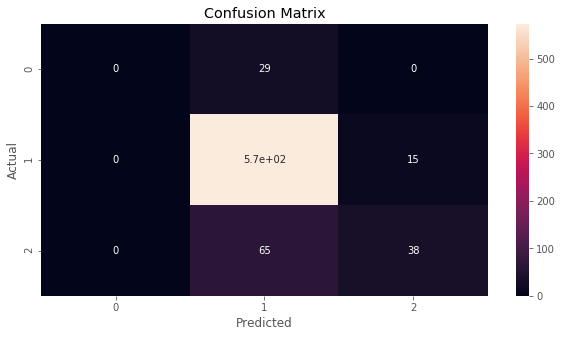

In [116]:
# KNN

knn_model_simple = neighbors.KNeighborsClassifier(30,weights="distance")
knn_model_simple.fit(x_train,y_train_simple)
#knn_model_simple.score(x_test,y_test_simple)

scoreModel(knn_model_simple,x_test,y_test_simple)


In [ ]:
# KMeans

km_model_simple = KMeans(n_clusters=3)
km_model_simple.fit(x_train,y_train_simple)
km_model_simple.score(x_test,y_test_simple)

km_pred_simple = km_model_simple.predict(x_train)

temp_df = pd.DataFrame()
temp_df["Quality"] = y_train_simple
temp_df["Cluster_num"] = km_pred_simple
temp_df.groupby("Quality")["Cluster_num"].nunique()

# list cluster ID counts per quality value

for val in temp_df["Quality"].unique():
    print("Quality {}\n".format(val),temp_df.loc[temp_df["Quality"]==val ,"Cluster_num"].value_counts())

Accuracy: 0.7805555555555556
Precision: [0.15384615 0.88669065 0.47101449]
Recall: [0.13793103 0.83843537 0.63106796]

Confusion Matrix:


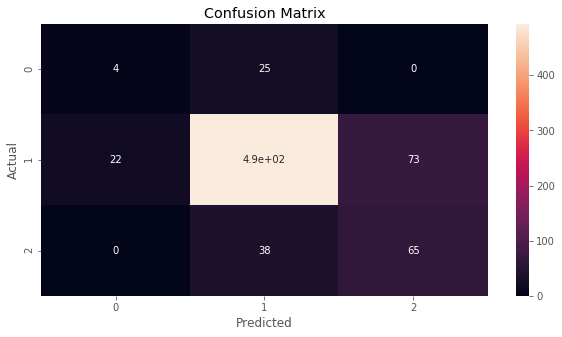

In [117]:
# Naive Bayes

nb_model_simple = GaussianNB()
nb_model_simple.fit(x_train,y_train_simple)
#nb_model_simple.score(x_test,y_test_simple)

scoreModel(nb_model_simple,x_test,y_test_simple)

Accuracy: 0.7916666666666666
Precision: [0.16666667 0.88675958 0.5       ]
Recall: [0.20689655 0.86564626 0.53398058]

Confusion Matrix:


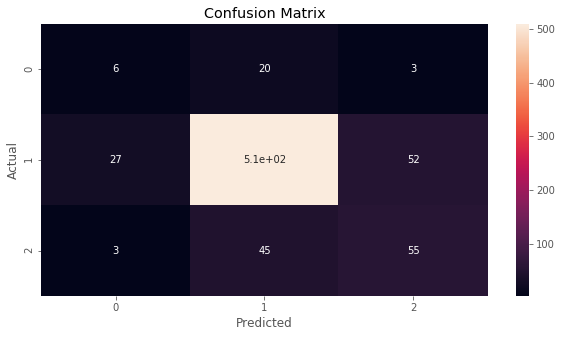

In [118]:
# Decision Tree Model

dt_model_simple = DecisionTreeClassifier(max_depth=100,criterion="gini")
dt_model_simple.fit(x_train,y_train_simple)
#dt_model_simple.score(x_test,y_test_simple)

scoreModel(dt_model_simple,x_test,y_test_simple)

Accuracy: 0.8430555555555556
Precision: [0.         0.86594761 0.64285714]
Recall: [0.         0.95578231 0.4368932 ]

Confusion Matrix:


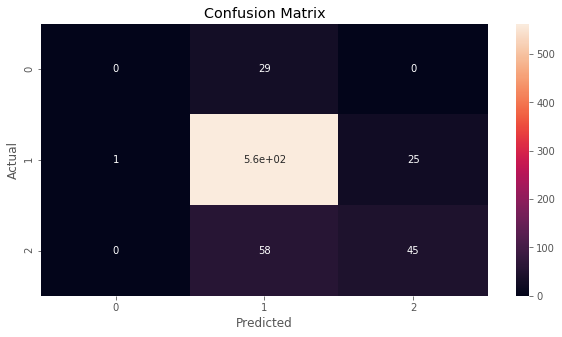

In [119]:
# Random Forest Model

rf_model_simple = RandomForestClassifier(n_estimators=100,max_depth=100)
rf_model_simple.fit(x_train,y_train_simple)
#rf_model_simple.score(x_test,y_test_simple)

scoreModel(rf_model_simple,x_test,y_test_simple)

/Users/jakubkasan/coding/data-science/wine-quality/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.8236111111111111
Precision: [0.         0.82695035 0.66666667]
Recall: [0.         0.9914966  0.09708738]

Confusion Matrix:


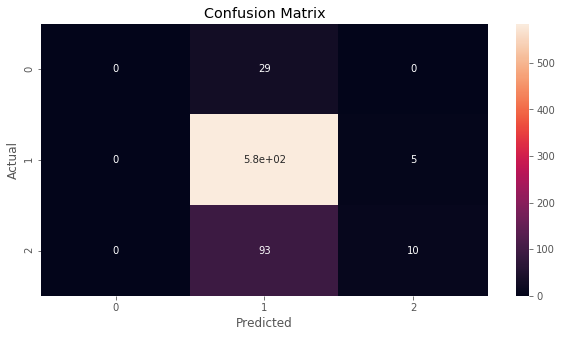

In [120]:
# Log Reg

log_model_simple = LogisticRegression()
log_model_simple.fit(x_train,y_train_simple)
#log_model_simple.score(x_test,y_test_simple)

scoreModel(log_model_simple,x_test,y_test_simple)


/Users/jakubkasan/coding/data-science/wine-quality/venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/jakubkasan/coding/data-science/wine-quality/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.8444444444444444
Precision: [0.         0.86280488 0.65625   ]
Recall: [0.         0.96258503 0.40776699]

Confusion Matrix:


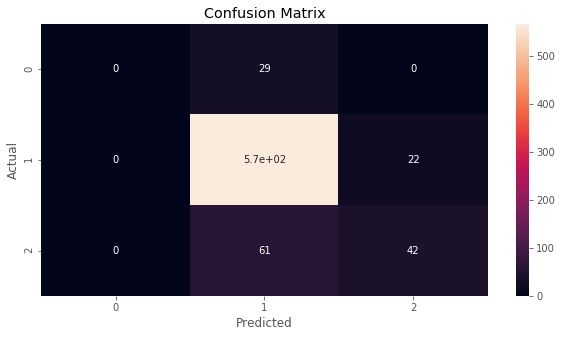

In [121]:
eclf_simple = VotingClassifier(estimators=[
    ("knn",knn_model_simple),
    ("nb",nb_model_simple),
    ("dt",dt_model_simple),
    ("rf",rf_model_simple),
    ("log",log_model_simple),
],voting="hard")

eclf_simple.fit(x_train,y_train_simple)
#eclf.score(x_test,y_test_simple)

scoreModel(eclf_simple,x_test,y_test_simple)

## Summary

The simplified model suffers from the same issues as the full model - lower performance when it comes to wines not "middle quality." Again, this is likely due to the lack of sample size for the extremity qualities, particularly 3 and 8. 

In [ ]:
## MAYBE FINISH



# Neural Network just for kicks

from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(11,activation="relu",input_dim=11))
model.add(Dense(11,activation="relu"))
model.add(Dense(11,activation="relu"))
model.add(Dense(11,activation="relu"))
model.add(Dense(11,activation="relu"))
model.add(Dense(11,activation="relu"))
model.add(Dense(11,activation="relu"))
model.add(Dense(11,activation="relu"))
model.add(Dense(6,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

y_train_nn = nn_class(y_train)
model.fit(x_train,y_train_nn,epochs=200,batch_size=200)

y_test_nn = nn_class(y_test)

model.evaluate(x_test,y_test_nn)

In [ ]:
x_train.shape

In [ ]:
model.predict(x_train).max()

In [ ]:
def nn_class(arr):
    keys = sorted(arr.unique())
    df = pd.DataFrame()
    for key in keys:
        df["{}".format(key)] = [1 if x == key else 0 for x in arr]
    return np.asmatrix(df)
    

In [ ]:
x_train.iloc[1:5,:]

In [ ]:
np.asmatrix(temp)

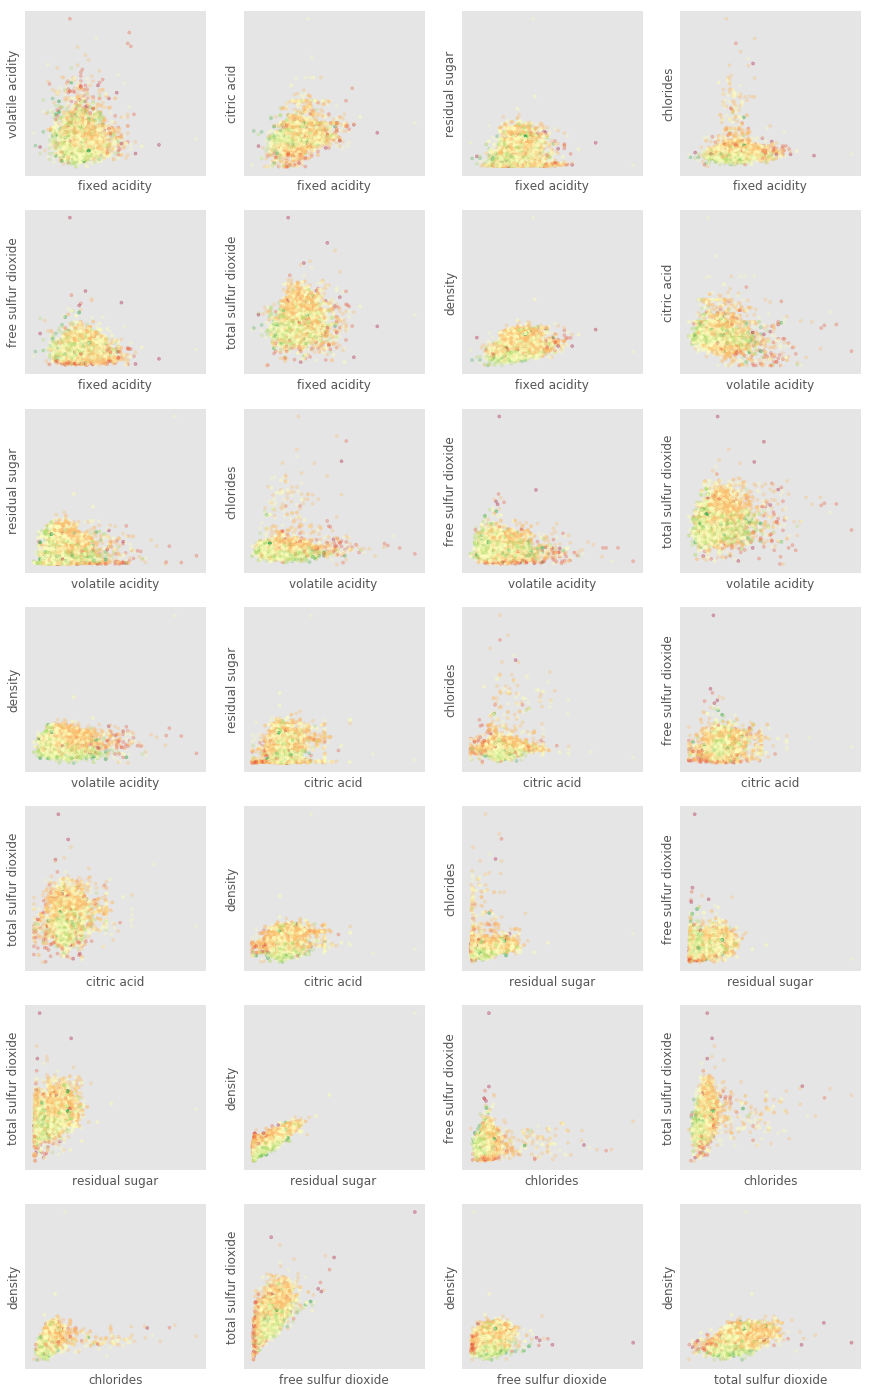

In [122]:
def crossPlot(df):
    n = len(df.columns)
    ns = [x for x in range(n)]
    fig, ax = plt.subplots(nrows=n,ncols=n,figsize=(15,15))
    for x,col in zip(ns,df.columns):
        for y,col2 in zip(ns[x:],df.columns[x:]):
            if col == col2:
                ax[y,x].hist(df[col])
            else:
                ax[y,x].scatter(df[col],df[col2],s=1,alpha=0.1,cmap="RdYlGn",c=df["quality"])
    plt.show()
    
def factorial(n):
    if n < 2:
        return 1
    else:
        return (n * factorial(n-1))
    
def aChooseB(a,b):
    if a < b:
        return 0
    return int(factorial(a)/(factorial(b)*factorial(a-b)))

def otherPlot(df,target,column_num=4):
    n = len(df.columns)
    plot_num = aChooseB(n,2)
    n = int(round(np.sqrt(plot_num)))
    ns = [x for x in range(n)]
    
    colsA = []
    colsB = []
    for x,colA in zip(ns,df.columns):
        for y,colB in zip(ns[x:],df.columns[x:]):
            if colA != colB:
                colsA.append(colA)
                colsB.append(colB)
                
    fig, ax = plt.subplots(ncols=column_num,nrows=int(np.ceil(len(colsA)/column_num)),figsize=(15,25))
    
    for colA,colB,axe in zip(colsA,colsB,ax.ravel()):
        title = colA + " vs. " + colB
        axe.scatter(df[colA],df[colB],cmap="RdYlGn",c=df["quality"],alpha=0.3,s=10)
        axe.set_ylabel(colB)
        axe.set_xlabel(colA)
        axe.set_yticks([])
        axe.set_xticks([])
        
    #plt.tight_layout()
    plt.show()
    return

otherPlot(whiteWine,"quality")

In [ ]:
crossPlot(redWine)

In [86]:
print(sorted(y_test.unique()))

[3, 4, 5, 6, 7, 8]


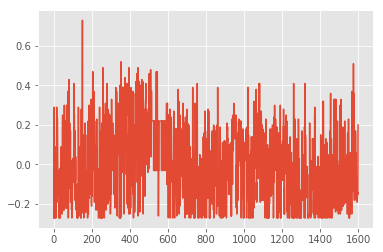

In [125]:
plt.plot((redWine["citric acid"] - redWine["citric acid"].mean()))
plt.show()

In [154]:
iso_model = IsolationForest(n_estimators=10,n_jobs=5,max_features=2)

In [155]:
iso_model.fit(x_train,y_train)

IsolationForest(bootstrap=False, contamination=0.1, max_features=2,
        max_samples='auto', n_estimators=10, n_jobs=5, random_state=None,
        verbose=0)

In [157]:
iso_pred = iso_model.predict(x_train)
print(confusion_matrix(y_train,iso_pred))

[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  3   5   0   0   0   0   0   0]
 [  7  19   0   0   0   0   0   0]
 [ 42 326   0   0   0   0   0   0]
 [ 27 336   0   0   0   0   0   0]
 [  9  98   0   0   0   0   0   0]
 [  0   7   0   0   0   0   0   0]]
